RESULT: w: [1, 1] b: -3
[[[3, 3], 1], [[2, 2], 0], [[1, 1], -1], [[0, 0], -2], [[3, 3], -1], [[2, 2], -2], [[1, 1], -3]]


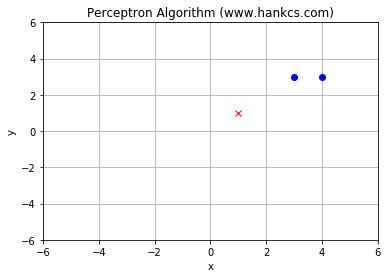

In [2]:
import copy
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
 
training_set = [[(3, 3), 1], [(4, 3), 1], [(1, 1), -1]]
w = [0, 0]
b = 0
history = []
 
 
def update(item):
    """
    update parameters using stochastic gradient descent
    :param item: an item which is classified into wrong class
    :return: nothing
    """
    global w, b, history
    w[0] += 1 * item[1] * item[0][0]
    w[1] += 1 * item[1] * item[0][1]
    b += 1 * item[1]
    history.append([copy.copy(w), b])
    # you can uncomment this line to check the process of stochastic gradient descent
 
 
def cal(item):
    """
    calculate the functional distance between 'item' an the dicision surface. output yi(w*xi+b).
    :param item:
    :return:
    """
    res = 0
    for i in range(len(item[0])):
        res += item[0][i] * w[i]
    res += b
    res *= item[1]
    return res
 
 
def check():
    """
    check if the hyperplane can classify the examples correctly
    :return: true if it can
    """
    flag = False
    for item in training_set:
        if cal(item) <= 0:
            flag = True
            update(item)
    # draw a graph to show the process
    if not flag:
        print("RESULT: w: " + str(w) + " b: " + str(b))
    return flag
 
 
if __name__ == "__main__":
    for i in range(1000):
        if not check(): break

    print(history)
 
    # first set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [], 'g', lw=2)
 
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        x, y, x_, y_ = [], [], [], []
        for p in training_set:
            if p[1] > 0:
                x.append(p[0][0])
                y.append(p[0][1])
            else:
                x_.append(p[0][0])
                y_.append(p[0][1])
 
        plt.plot(x, y, 'bo', x_, y_, 'rx')
        plt.axis([-6, 6, -6, 6])
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Perceptron Algorithm (www.hankcs.com)')
        return line,
 
 
    # animation function.  this is called sequentially
    def animate(i):
        global history, ax, line
 
        w = history[i][0]
        b = history[i][1]
        if w[1] == 0: return line, 
        x1 = -7
        y1 = -(b + w[0] * x1) / w[1]
        x2 = 7
        y2 = -(b + w[0] * x2) / w[1]
        line.set_data([x1, x2], [y1, y2])
        return line,
 
    # call the animator.  blit=true means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=1000, repeat=True,
                                   blit=True)
    plt.show()